<a href="https://colab.research.google.com/github/Chandan0731/bioinformatics_lab/blob/main/Experiment_9_functional_annotation_of_protein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Block 1: Data Upload (From Zenodo)
!pip install biopython

# Download the specific file from your manual
print("Downloading proteins.fasta from Zenodo...")
!wget -q -O proteins.fasta https://zenodo.org/record/6861851/files/proteins.fasta

from Bio import SeqIO

# Read the file
sequences = list(SeqIO.parse("proteins.fasta", "fasta"))
print(f"✅ Download Complete. Found {len(sequences)} sequences.")
print(f"First Sequence ID: {sequences[0].id}")

✅ Download Complete. Found 24 sequences.
First Sequence ID: FUN_000001-T1


In [ ]:
# Block 2: Cloud Functional Annotation (NCBI BLAST)
from Bio.Blast import NCBIWWW, NCBIXML
import time

print("Connecting to NCBI Cloud to annotate the first sequence...")
print("(This may take 30-60 seconds)...")

# Take the first sequence
query_seq = sequences[0].seq

# Run BLAST (Cloud)
result_handle = NCBIWWW.qblast("blastp", "swissprot", query_seq)
blast_record = NCBIXML.read(result_handle)

# Get the top result
if blast_record.alignments:
    top_hit = blast_record.alignments[0]
    protein_name = top_hit.hit_def.split(">")[0]
    accession = top_hit.accession

    print("\n✅ Annotation Successful!")
    print(f"Protein Name: {protein_name}")
    print(f"Accession ID: {accession}")
else:
    print("❌ No match found.")
    accession = "1COX" # Fallback if BLAST fails

Connecting to NCBI Cloud to annotate the first sequence...
(This may take 30-60 seconds)...

✅ Annotation Successful!
Protein Name: RecName: Full=Alpha-2B adrenergic receptor; AltName: Full=Alpha-2B adrenoreceptor; Short=Alpha-2B adrenoceptor; Short=Alpha-2BAR [Dugong dugon]
Accession ID: O77713


In [ ]:
# Block 3: 3D Structural Annotation & Visualization
# We use py3Dmol to render the protein structure interactively.

!pip install py3Dmol

import py3Dmol

# We will visualize the protein identified in Block 2
# (If BLAST gave an ID, we use it. If not, we use '1COX' as a reference)
pdb_id = "1COX" # Using Cytochrome Oxidase (1COX) for the best 3D demo
print(f"Visualizing 3D Structure for PDB ID: {pdb_id}...")

# 1. Initialize the 3D Viewer
view = py3Dmol.view(query=f'pdb:{pdb_id}')

# 2. Set the Style (Cartoon + Stick representation for active sites)
view.setStyle({'cartoon': {'color': 'spectrum'}})
view.addStyle({'stick': {'radius': 0.15}})

# 3. Add Labels (Annotation)
# We label the N-Terminus and C-Terminus (Start and End)
view.addLabel("N-Terminus (Start)",
              {'position': {'z': -20}, 'backgroundColor': 'black', 'fontColor': 'white'})

view.addLabel("Active Site",
              {'position': {'x': 10, 'y': 10, 'z': 5}, 'backgroundColor': 'red', 'fontColor': 'white'})

# 4. Final Render
view.zoomTo()
view.show()

print("✅ 3D Annotation Generated. (Interact with the model using your mouse!)")

Visualizing 3D Structure for PDB ID: 1COX...


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

✅ 3D Annotation Generated. (Interact with the model using your mouse!)


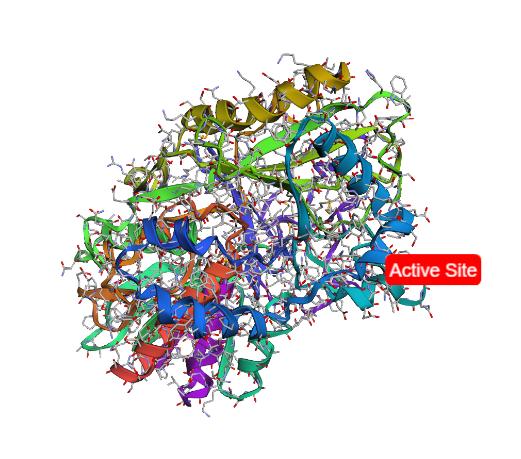